In [1]:
import pandas as pd
import numpy as np
import shap

In [15]:
baseline = pd.read_csv("baseline.csv")

In [3]:
import joblib

In [5]:
model = joblib.load("model.joblib")

In [6]:
scaler = joblib.load("scaler.joblib")

In [40]:
explainer = shap.KernelExplainer(model.predict_proba, one_b.iloc[:5])

In [10]:
def one_hot(data):
    if 'object' in [data[i].dtype for i in data]:
        object_data = data.select_dtypes(include='object')
        object_df = pd.get_dummies(object_data)
        rest_data = data.select_dtypes(exclude='object')
        return pd.concat([object_df, rest_data],axis=1)
    else:
        return data

In [16]:
one_b = one_hot(baseline)

In [17]:
one_b.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Flat,ST_Slope_Up,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target
0,0,1,0,1,0,0,0,1,0,1,...,0,1,0,40,140,289,0,172,0.0,0
1,1,0,0,0,1,0,0,1,0,1,...,1,0,1,49,160,180,0,156,1.0,1
2,1,0,1,0,0,0,0,1,0,0,...,1,0,3,48,138,214,0,108,1.5,1
3,0,1,0,0,1,0,0,1,0,1,...,0,1,4,54,150,195,0,122,0.0,0
4,1,0,0,1,0,0,0,1,0,1,...,0,1,6,45,130,237,0,170,0.0,0


In [18]:
one_b.drop(["target","Unnamed: 0"], axis=1, inplace=True)
scaled = scaler.transform(one_b)

In [41]:
shap_val = explainer(one_b[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

divide by zero encountered in log
invalid value encountered in true_divide


In [42]:
shap_val.shape

(5, 20, 2)

In [32]:
shap_values = shap_val.values

In [27]:
shap_val.data.shape

(500, 20)

In [36]:
shap.plots.waterfall(shap_val[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (20, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [45]:
baseline.head()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [46]:
baseline.drop("Unnamed: 0", axis=1, inplace=True)
X = one_hot(baseline.drop("target",axis=1))

In [47]:
X.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,40,140,289,0,172,0.0
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0
2,1,0,1,0,0,0,0,1,0,0,1,0,1,0,48,138,214,0,108,1.5
3,0,1,0,0,1,0,0,1,0,1,0,0,0,1,54,150,195,0,122,0.0
4,1,0,0,1,0,0,0,1,0,1,0,0,0,1,45,130,237,0,170,0.0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
y = baseline['target']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [55]:
model = KNeighborsClassifier(n_neighbors=5)

In [56]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

In [58]:
accuracy_score(y_pred, y_test)

0.8606060606060606

In [59]:
explainer = shap.Explainer(model.predict_proba, X_train)

In [62]:
shap_values = explainer.shap_values(X_test)

In [63]:
shap_values.shape

(165, 20, 2)

In [65]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [78]:
def f(x):
    return model.predict_proba(x)[:, random.randint(0,1)]

explainer = shap.Explainer(f, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 166it [00:27,  3.81it/s]                                                               


In [79]:
shap_values.shape

(165, 20)

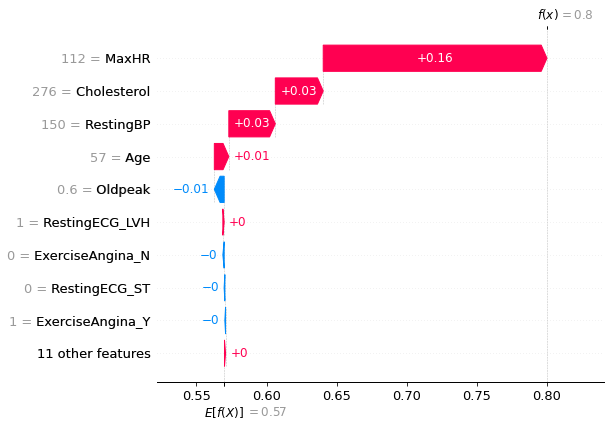

In [80]:
shap.plots.waterfall(shap_values[0])

In [74]:
model.predict_proba(X_train)

array([[0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2,

In [75]:
model.predict_proba(X_train)[:, 1]

array([0.8, 0.8, 0.2, 0.8, 0.4, 1. , 0.6, 0.6, 0.4, 1. , 0.8, 0.8, 0.8,
       0.4, 0. , 0.4, 1. , 0.4, 0.4, 0.8, 0. , 0.2, 0.6, 1. , 0.8, 0.4,
       0.8, 0. , 1. , 0. , 0.4, 0.4, 0.8, 0.4, 0.6, 0.4, 0.4, 1. , 0.8,
       1. , 1. , 1. , 0.2, 0.6, 0.6, 0.4, 0. , 0.8, 0.8, 0.8, 0.6, 0.6,
       0.8, 0.8, 0.8, 0.2, 0.6, 0.4, 1. , 0.8, 0.8, 1. , 0.6, 0.2, 0. ,
       0.2, 0. , 0.2, 0.8, 0.2, 0. , 0.2, 0.8, 0.4, 0.8, 0.4, 1. , 0.4,
       0.2, 0. , 0.2, 0.2, 0.4, 0.4, 0.8, 0.4, 1. , 0.4, 1. , 1. , 0.2,
       0.4, 1. , 0. , 0.2, 0.8, 1. , 1. , 0.4, 0.4, 0.8, 1. , 0.6, 0.2,
       0.6, 1. , 0.8, 1. , 0.6, 0.6, 0. , 0.4, 0.2, 1. , 0.4, 0.8, 1. ,
       0.2, 0.6, 0. , 0. , 0.6, 0.6, 0.6, 0.4, 0. , 0.6, 0. , 0. , 0.2,
       0.8, 1. , 0. , 0. , 0.6, 0.6, 1. , 0.8, 1. , 0. , 0.4, 0.8, 1. ,
       0.4, 0.2, 0.2, 0.8, 0. , 0. , 1. , 1. , 0.6, 0.4, 0. , 0.6, 0.6,
       0. , 0.6, 0. , 0.6, 1. , 0.4, 0.4, 0.8, 0.6, 0.8, 0.6, 0. , 0. ,
       0.8, 0.6, 0. , 0.8, 0.8, 0.8, 0.4, 0.8, 0.2, 0.8, 0.8, 0.

In [81]:
import random

In [84]:
random.randint(0,1)

1

In [86]:
random.randint(0,len(X_train))

12